Competition: https://www.kaggle.com/competitions/playground-series-s4e1/overview

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

In [16]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
train_data.head()
all_data = pd.concat([train_data, test_data])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275057 entries, 0 to 110022
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               275057 non-null  int64  
 1   CustomerId       275057 non-null  int64  
 2   Surname          275057 non-null  object 
 3   CreditScore      275057 non-null  int64  
 4   Geography        275057 non-null  object 
 5   Gender           275057 non-null  object 
 6   Age              275057 non-null  float64
 7   Tenure           275057 non-null  int64  
 8   Balance          275057 non-null  float64
 9   NumOfProducts    275057 non-null  int64  
 10  HasCrCard        275057 non-null  float64
 11  IsActiveMember   275057 non-null  float64
 12  EstimatedSalary  275057 non-null  float64
 13  Exited           165034 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 31.5+ MB


In [17]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


<Axes: xlabel='Exited', ylabel='count'>

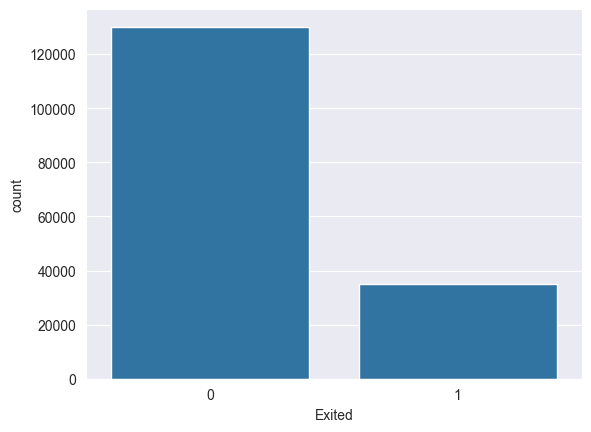

In [18]:
sns.countplot(data=train_data, x="Exited")

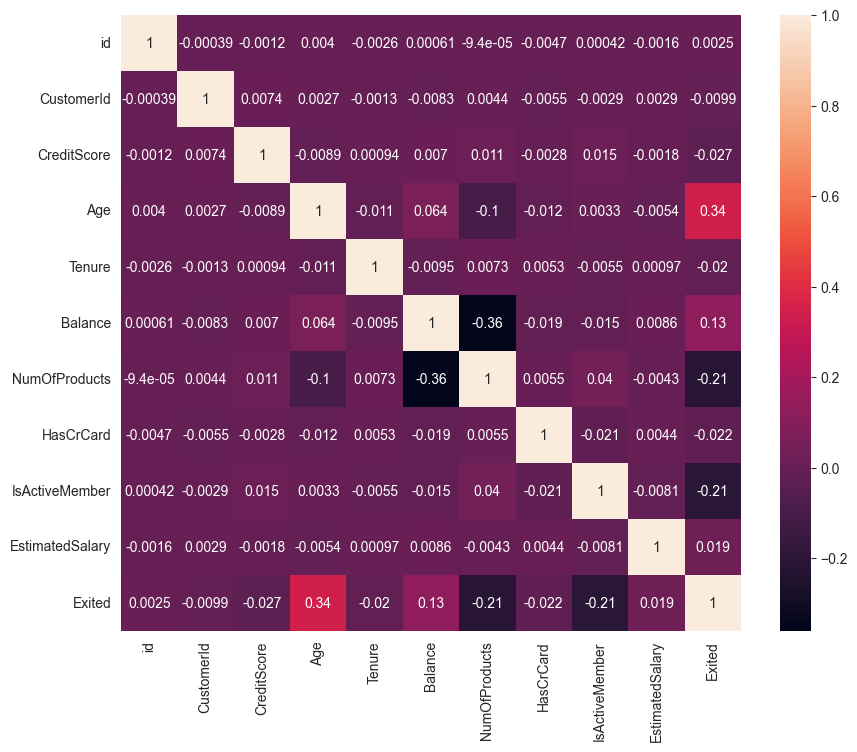

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)
plt.show()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


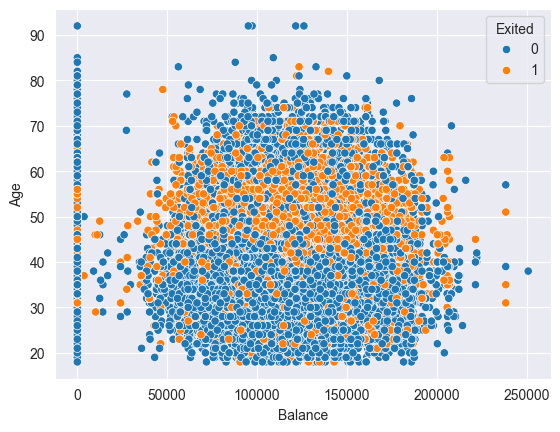

In [20]:
sns.scatterplot(data=train_data, x="Balance", y="Age", hue="Exited")
train_data.head()

In [21]:
train_data = train_data.drop(["id","CustomerId","Surname"],axis=1)
test_data = test_data.drop(["id","CustomerId","Surname"],axis=1)

In [22]:
encoded_train_data = pd.get_dummies(data=train_data, columns=["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"])
encoded_test_data = pd.get_dummies(data=test_data, columns=["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"])
encoded_train_data.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,668,33.0,3,0.00,181449.97,0,True,False,False,False,True,False,True,False,False,False,True,True,False
1,627,33.0,1,0.00,49503.50,0,True,False,False,False,True,False,True,False,False,False,True,False,True
2,678,40.0,10,0.00,184866.69,0,True,False,False,False,True,False,True,False,False,False,True,True,False
3,581,34.0,2,148882.54,84560.88,0,True,False,False,False,True,True,False,False,False,False,True,False,True
4,716,33.0,5,0.00,15068.83,0,False,False,True,False,True,False,True,False,False,False,True,False,True


In [23]:
X = encoded_train_data.drop(["Exited"],axis=1)
y = encoded_train_data["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y) #сохраняет равную долю
X.shape

(165034, 18)

param_grid = {
     'max_depth': [3, 4, 5],
     'learning_rate': [0.05, 0.01, 0.1],
     'gamma': [0, 0.25, 1.0],
     'reg_lambda': [0, 1.0, 10.0],
     'scale_pos_weight': [1, 3, 5]
 }
 
optimal_parameters = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', subsample=0.9,  colsample_bytree=0.5 ,random_state=42), param_grid=param_grid, scoring="roc_auc", cv=3, verbose=3, n_jobs=10)
optimal_parameters.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='auc',verbose=True)
print(optimal_parameters.best_params_)

In [24]:
"""
param_grid = {
    'max_depth': np.arange(1, 8).tolist(),
    'learning_rate': np.arange(0.1, 1, 0.1).tolist(),
    'gamma': np.arange(0, 2, 0.25).tolist(),
    'reg_lambda': np.arange(0, 30, 5).tolist(),
    'scale_pos_weight': np.arange(1, 10, 2).tolist()
}

optimal_parameters = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', subsample=0.9,  colsample_bytree=0.5 ,random_state=42), param_grid=param_grid, scoring="roc_auc", cv=3, verbose=3, n_jobs=10)
optimal_parameters.fit(X,y,verbose=True)
print(optimal_parameters.best_estimator_)"""

'\nparam_grid = {\n    \'max_depth\': np.arange(1, 8).tolist(),\n    \'learning_rate\': np.arange(0.1, 1, 0.1).tolist(),\n    \'gamma\': np.arange(0, 2, 0.25).tolist(),\n    \'reg_lambda\': np.arange(0, 30, 5).tolist(),\n    \'scale_pos_weight\': np.arange(1, 10, 2).tolist()\n}\n\noptimal_parameters = GridSearchCV(estimator=xgb.XGBClassifier(objective=\'binary:logistic\', subsample=0.9,  colsample_bytree=0.5 ,random_state=42), param_grid=param_grid, scoring="roc_auc", cv=3, verbose=3, n_jobs=10)\noptimal_parameters.fit(X,y,verbose=True)\nprint(optimal_parameters.best_estimator_)'

In [25]:
#print(optimal_parameters.best_params_)

In [26]:
clf_xgb_v2 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=1.0,
                               learning_rate=0.1,
                               max_depth=7,
                               reg_lambda=25.0,
                               scale_pos_weight=1,
                               subsample=0.9,
                               colsample_bytree=0.5)

clf_xgb_v2.fit(X_train,
               y_train,
               verbose=True,
               early_stopping_rounds=10,
               eval_metric='auc',
               eval_set=[(X_test,y_test)])
clf_xgb_v2.score(X_test,y_test)

C:\Users\vlads\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\vlads\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83683
[1]	validation_0-auc:0.87693
[2]	validation_0-auc:0.88082
[3]	validation_0-auc:0.88020
[4]	validation_0-auc:0.87973
[5]	validation_0-auc:0.87729
[6]	validation_0-auc:0.88154
[7]	validation_0-auc:0.88044
[8]	validation_0-auc:0.88239
[9]	validation_0-auc:0.88474
[10]	validation_0-auc:0.88392
[11]	validation_0-auc:0.88460
[12]	validation_0-auc:0.88433
[13]	validation_0-auc:0.88518
[14]	validation_0-auc:0.88535
[15]	validation_0-auc:0.88611
[16]	validation_0-auc:0.88656
[17]	validation_0-auc:0.88670
[18]	validation_0-auc:0.88668
[19]	validation_0-auc:0.88677
[20]	validation_0-auc:0.88672
[21]	validation_0-auc:0.88700
[22]	validation_0-auc:0.88733
[23]	validation_0-auc:0.88755
[24]	validation_0-auc:0.88750
[25]	validation_0-auc:0.88772
[26]	validation_0-auc:0.88788
[27]	validation_0-auc:0.88809
[28]	validation_0-auc:0.88815
[29]	validation_0-auc:0.88814
[30]	validation_0-auc:0.88812
[31]	validation_0-auc:0.88817
[32]	validation_0-auc:0.88826
[33]	validation_0-au

0.8661625342349548

In [27]:
final_model = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=1.0,
                               learning_rate=0.1,
                               max_depth=5,
                               reg_lambda=10.0,
                               scale_pos_weight=5,
                               subsample=0.9,
                               colsample_bytree=0.5)
final_model.fit(X,y,verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
predictions = final_model.predict(encoded_test_data)

In [29]:
predictions.shape

(110023,)

In [30]:
submission = pd.read_csv('data/sample_submission.csv')
submission_df = pd.DataFrame(columns=['id', 'Exited'])
submission_df['id'] = submission["id"]
submission_df['Exited'] = predictions
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(10)

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,1
4,165038,1
5,165039,0
6,165040,0
7,165041,0
8,165042,1
9,165043,0
